----------------------------------------------------------------------------------------------------
Processing: Equation 1: 3x^5 - 6x^2 + 11x - 6
Initial guesses: x0 = -1, x1 = 0.5
Root found: 0.80318 (Secant Method) in 3 iterations.


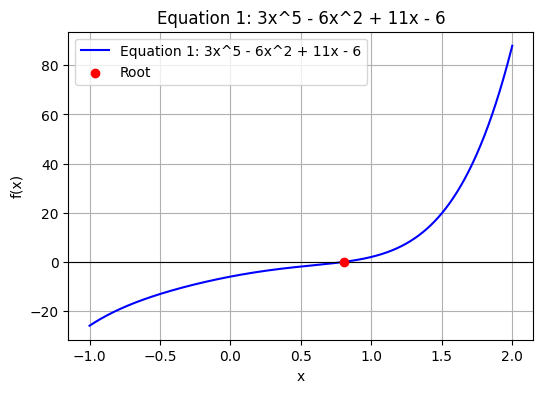


                                                                                                    
----------------------------------------------------------------------------------------------------
Processing: Equation 2: e^x + 3x^3
Initial guesses: x0 = -1, x1 = 0.0
Root found: -0.57221 (Secant Method) in 6 iterations.


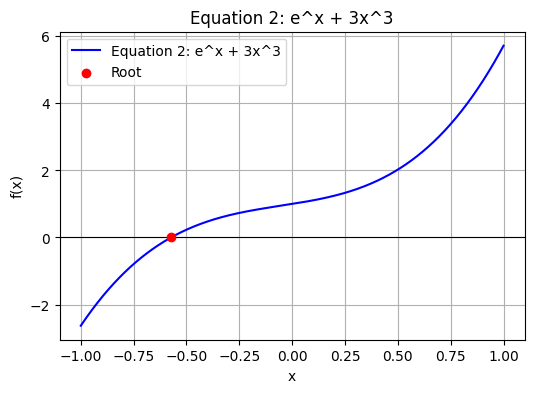


                                                                                                    
----------------------------------------------------------------------------------------------------
Processing: Equation 3: sin(x) + e^x - 3x
Initial guesses: x0 = -2, x1 = 0.0
Root found: 0.90245 (Secant Method) in 16 iterations.


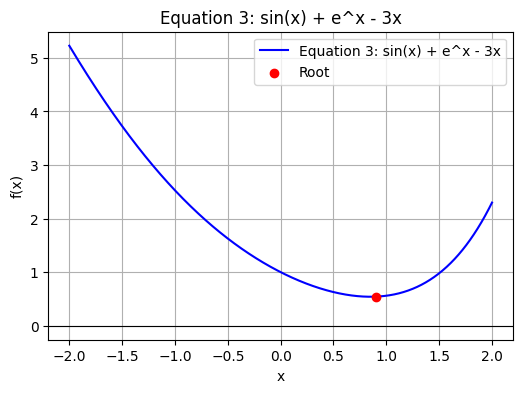


                                                                                                    
----------------------------------------------------------------------------------------------------
Processing: Equation 4: (4x - 3x^4)/e^sin(x)
Initial guesses: x0 = -1, x1 = 0.5
Root found: 0.00083 (Secant Method) in 7 iterations.


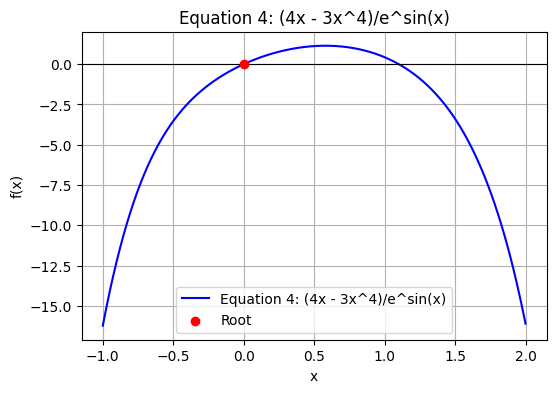


                                                                                                    
----------------------------------------------------------------------------------------------------
Processing: Equation 5: (2 + cos(x))/(3e^sin(x))
Initial guesses: x0 = -1, x1 = 0.0
No real root found using Secant Method. Possible reasons:
 - The function may have complex (imaginary) roots.
 - The method did not converge due to poor initial guesses.
 - The function might not have a root in the given interval.


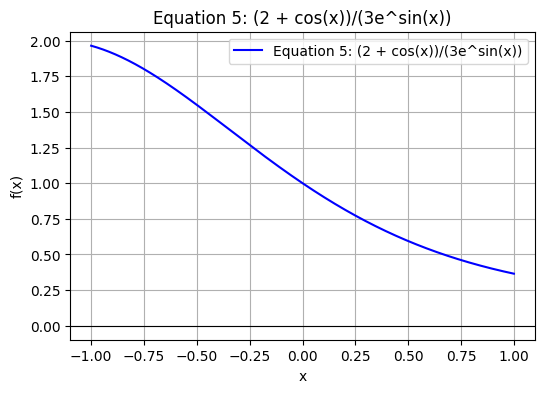

In [3]:
#secant method

import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return 3*x**5 - 6*x**2 + 11*x - 6

def f2(x):
    return np.exp(x) + 3*x**3

def f3(x):
    return np.sin(x) + np.exp(x) - 3*x

def f4(x):
    return (4*x - 3*x**4) / np.exp(np.sin(x))

def f5(x):
    return (2 + np.cos(x)) / (3 * np.exp(np.sin(x)))

def secant_method(f, x0, x1, tol=0.05, max_iter=50):
    prev_x, curr_x = x0, x1

    for i in range(max_iter):
        fx0, fx1 = f(prev_x), f(curr_x)
        
        if fx1 - fx0 == 0:
            return None 
        
        x_new = curr_x - fx1 * (curr_x - prev_x) / (fx1 - fx0)
        
        if abs(x_new - curr_x) < tol:
            return x_new, i+1
        
        prev_x, curr_x = curr_x, x_new
    
    return None 

def plot_function(f, a, b, title, root=None):
    x = np.linspace(a, b, 1000)
    y = f(x)
    
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label=title, color='blue')
    plt.axhline(0, color='black', linewidth=0.8)
    
    if root is not None:
        plt.scatter(root, f(root), color='red', zorder=5, label="Root")
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

functions = [
    (f1, -1, 2, "Equation 1: 3x^5 - 6x^2 + 11x - 6"),
    (f2, -1, 1, "Equation 2: e^x + 3x^3"),
    (f3, -2, 2, "Equation 3: sin(x) + e^x - 3x"),
    (f4, -1, 2, "Equation 4: (4x - 3x^4)/e^sin(x)"),
    (f5, -1, 1, "Equation 5: (2 + cos(x))/(3e^sin(x))")
]

for f, a, b, title in functions:
    x0, x1 = a, (a + b) / 2  
    root_secant = secant_method(f, x0, x1)
    
    print("-" * 100)
    print(f"Processing: {title}")
    print(f"Initial guesses: x0 = {x0}, x1 = {x1}")
    
    if root_secant:
        root, iterations = root_secant
        print(f"Root found: {root:.5f} (Secant Method) in {iterations} iterations.")
        plot_function(f, a, b, title, root=root)
    else:
        print(f"No real root found using Secant Method. Possible reasons:")
        print(" - The function may have complex (imaginary) roots.")
        print(" - The method did not converge due to poor initial guesses.")
        print(" - The function might not have a root in the given interval.")
        plot_function(f, a, b, title)
    
    print("\n" + " " * 100) 


In [ ]:
# Part 5: Reflection and Discussion – Secant Method

## 1. How did the graph help in identifying the best initial guesses for the Secant method?  
The graph is crucial in selecting two initial points that are reasonably close to a root. Since the Secant method approximates the derivative using two points, choosing points near where the function crosses the x-axis increases the likelihood of convergence. If the points are too far apart or in a region where the function behaves unpredictably, the method may take longer to converge or fail.  

## 2. What is the role of the tolerance ε in determining the accuracy of the root?  
The tolerance ε determines when the method stops iterating:  
- A smaller ε increases accuracy but requires more iterations.  
- A larger ε speeds up the process but results in a less precise approximation.  
- If ε is too large, the method may stop before reaching a sufficiently accurate root.  

## 3. How does the number of iterations change with different initial guesses?  
The number of iterations depends on how well the two initial guesses approximate the function's behavior:  
- If the chosen points are close to the root, the method converges faster.  
- If they are far apart or near inflection points, convergence slows down.  
- If the function behaves erratically between the points, the method may fail or oscillate.  

## 4. Which equation required fewer iterations to find the root, and why?  
Equations with roots that are well-separated and have strong slopes converged more quickly because the Secant method efficiently approximates derivatives in such cases. However, equations with closely spaced roots, flat regions, or multiple turning points required more iterations or failed to converge due to poor initial approximations.  
